In [21]:
import pandas as pd

df = pd.read_excel(r"D:\downloads\Bengaluru_House_Data_With_Year.xlsx")
df.dropna(subset=["location", "size", "total_sqft", "bath", "balcony", "price"], inplace=True)

def convert_size_to_bhk(size):
    try:
        return int(size.split(' ')[0])
    except:
        return None

df['bhk'] = df['size'].apply(convert_size_to_bhk)
df.dropna(subset=["bhk"], inplace=True)

def convert_sqft_to_num(sqft):
    try:
        return float(sqft)
    except:
        if isinstance(sqft, str) and '-' in sqft:
            tokens = sqft.split('-')
            try:
                return (float(tokens[0]) + float(tokens[1])) / 2
            except:
                return None
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.dropna(subset=["total_sqft"], inplace=True)

def get_price(location, size, balcony, bath, total_sqft):
    bhk = convert_size_to_bhk(size)
    sqft = round(convert_sqft_to_num(str(total_sqft)), 2)

    try:
        bath = float(bath)
        balcony = float(balcony)
    except:
        print("Invalid bath or balcony input. They must be numbers.")
        return None

    match = df[
        (df['location'].str.lower() == location.lower()) &
        (df['bhk'] == bhk) &
        (df['total_sqft'].round(2) == sqft) &
        (df['bath'] == bath) &
        (df['balcony'] == balcony)
    ]

    if not match.empty:
        price = match['price'].mean()
        print(f"\nEstimated Price: ₹{price:.2f} Lakhs")
        return price
    else:
        print("\n No exact match found. Try adjusting the input or check the spelling.")
        return None


In [22]:
get_price("whitefield", "3 BHK", 2, 2, 1760)



Estimated Price: ₹126.50 Lakhs


126.5

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

def plot_prices_in_location(location):
    filtered = df[df['location'].str.lower() == location.lower()]
    
    if filtered.empty:
        print("No listings found for this location.")
        return
    
    # Convert total_sqft to numeric
    filtered['total_sqft'] = pd.to_numeric(filtered['total_sqft'], errors='coerce')
    filtered = filtered.dropna(subset=['total_sqft', 'price', 'bhk'])
    filtered = filtered.sort_values(by="total_sqft")
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered, x='total_sqft', y='price', hue='bhk', palette='viridis', s=100)
    
    plt.title(f"Price Distribution in {location}", fontsize=16)
    plt.xlabel("Total Sqft")
    plt.ylabel("Price (Lakhs)")
    plt.legend(title='BHK')
    plt.grid(True)
    plt.show()


Enter location:  Hebbal


C:\Users\PANIDHAR\AppData\Local\Temp\ipykernel_15260\1879709999.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['total_sqft'] = pd.to_numeric(filtered['total_sqft'], errors='coerce')


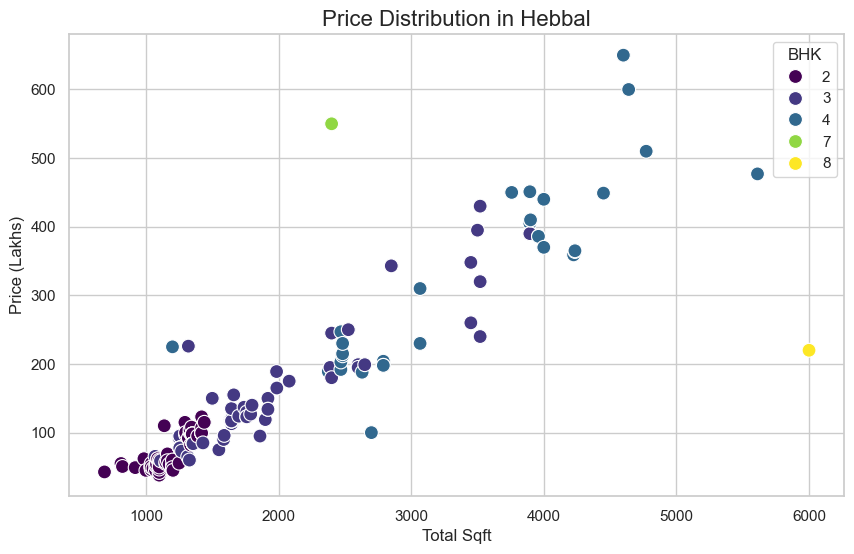

NameError: name 'plot_avg_price_per_bhk' is not defined

In [27]:
location = input("Enter location: ")
plot_prices_in_location(location)
plot_avg_price_per_bhk(location)

C:\Users\PANIDHAR\AppData\Local\Temp\ipykernel_15260\1433591412.py:55: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\PANIDHAR\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


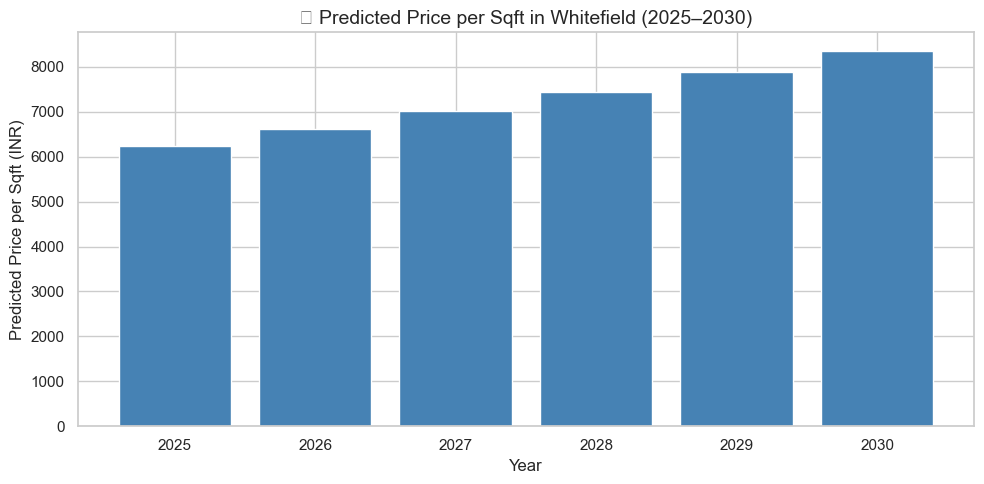

2025: ₹6,240.11 per sqft
2026: ₹6,614.51 per sqft
2027: ₹7,011.38 per sqft
2028: ₹7,432.07 per sqft
2029: ₹7,877.99 per sqft
2030: ₹8,350.67 per sqft


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your updated dataset with the 'year' column
df = pd.read_excel(r"D:\downloads\Bengaluru_House_Data_With_Year.xlsx")

# Clean and prepare the dataset
df = df.dropna(subset=["price", "total_sqft", "location"])
df['total_sqft'] = df['total_sqft'].astype(str)

# Convert total_sqft to numeric
def convert_sqft_to_num(x):
    try:
        return float(x)
    except:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0]) + float(tokens[1])) / 2
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df = df.dropna(subset=['total_sqft'])

# Calculate price per sqft
df['price_per_sqft'] = df['price'] * 100000 / df['total_sqft']

# Prediction function
def predict_future_prices(location, growth_rate=0.06):
    location = location.lower()
    filtered = df[df['location'].str.lower() == location]

    if filtered.empty:
        print(" No data found for this location.")
        return

    # Use data from most recent year (2024) for base price
    recent_data = filtered[filtered['year'] == 2024]
    if recent_data.empty:
        print(" No recent data (2024) available for this location.")
        return

    base_price = recent_data['price_per_sqft'].mean()

    # Predict prices from 2025 to 2030 using compound growth
    years = list(range(2025, 2031))
    predictions = [base_price * ((1 + growth_rate) ** (year - 2024)) for year in years]

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.bar(years, predictions, color='steelblue')
    plt.title(f"📈 Predicted Price per Sqft in {location.title()} (2025–2030)", fontsize=14)
    plt.xlabel("Year")
    plt.ylabel("Predicted Price per Sqft (INR)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Print values
    for year, price in zip(years, predictions):
        print(f"{year}: ₹{price:,.2f} per sqft")

# Example usage
# Just replace "Whitefield" with any location you want to check
predict_future_prices("Whitefield")


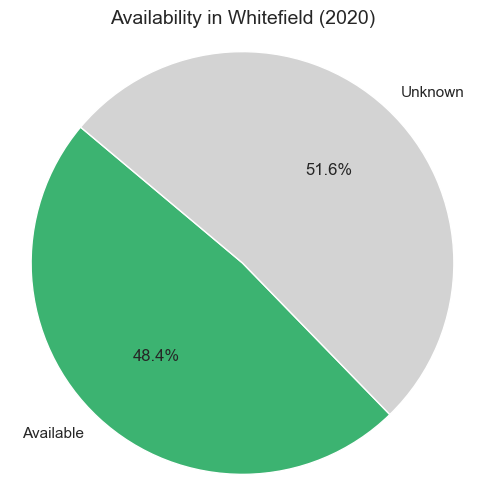

In [29]:
import matplotlib.pyplot as plt

def plot_availability_pie(location, year):
    # Filter data
    filtered = df[
        (df['location'].str.lower() == location.lower()) &
        (df['year'] == year)
    ]

    if filtered.empty:
        print("❌ No data found for this location and year.")
        return

    # Clean and group availability
    availability_data = filtered['availability'].fillna('Unknown').str.strip()
    counts = availability_data.value_counts()

    # Map availability to Available / Occupied categories
    def label_category(val):
        if 'ready' in val.lower() or 'available' in val.lower():
            return 'Available'
        elif 'under' in val.lower():
            return 'Occupied'
        else:
            return 'Unknown'

    labels_mapped = counts.index.map(label_category)
    final_counts = counts.groupby(labels_mapped).sum()

    # Define custom colors
    colors = {
        'Available': 'mediumseagreen',
        'Occupied': 'tomato',
        'Unknown': 'lightgray'
    }

    used_colors = [colors.get(cat, 'gray') for cat in final_counts.index]

    # Plot
    plt.figure(figsize=(6, 6))
    plt.pie(final_counts, labels=final_counts.index, autopct='%1.1f%%', colors=used_colors, startangle=140)
    plt.title(f"Availability in {location.title()} ({year})", fontsize=14)
    plt.axis('equal')
    plt.show()

# Example usage:
plot_availability_pie("Whitefield", 2020)


C:\Users\PANIDHAR\AppData\Local\Temp\ipykernel_16460\1047504080.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=house_df, x='area_type', order=house_df['area_type'].value_counts().index, palette='pastel')


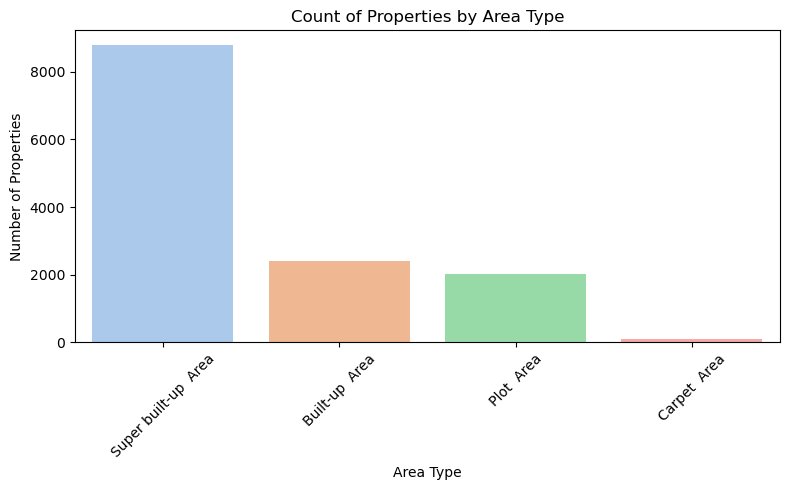

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
house_df = pd.read_excel(r"D:\downloads\Bengaluru_House_Data_With_Year.xlsx")

# Plot: Count of Properties by Area Type
plt.figure(figsize=(8, 5))
sns.countplot(data=house_df, x='area_type', order=house_df['area_type'].value_counts().index, palette='pastel')
plt.title("Count of Properties by Area Type")
plt.xlabel("Area Type")
plt.ylabel("Number of Properties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\PANIDHAR\AppData\Local\Temp\ipykernel_16460\1320419448.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')


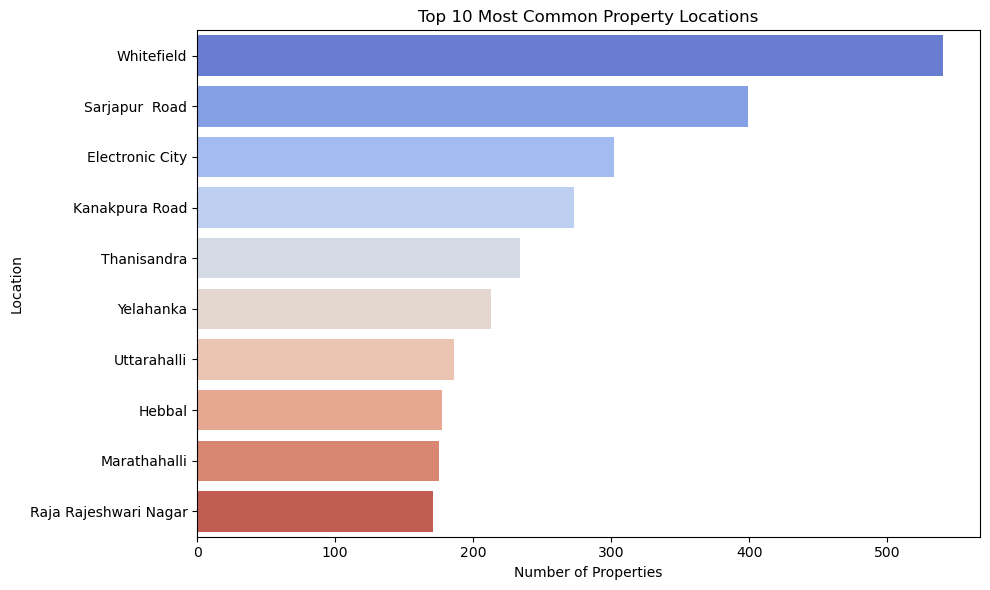

In [18]:
plt.figure(figsize=(10, 6))
top_locations = house_df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='coolwarm')
plt.title("Top 10 Most Common Property Locations")
plt.xlabel("Number of Properties")
plt.ylabel("Location")
plt.tight_layout()
plt.show()


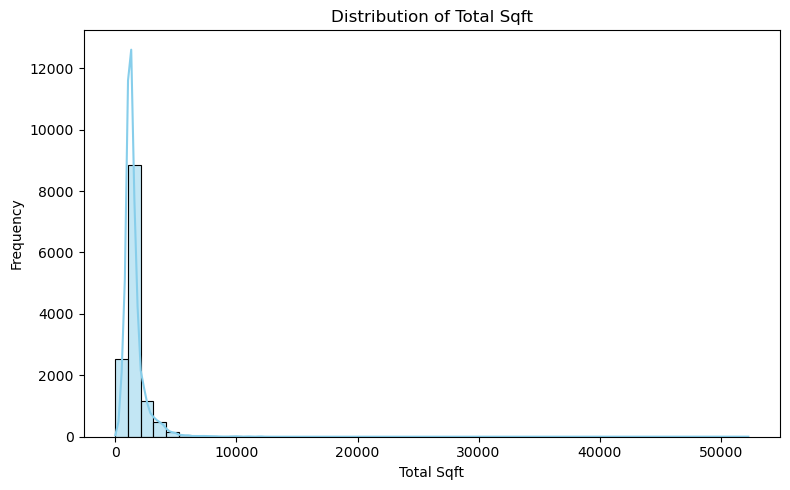

In [20]:
#Distribution of Total Sqft
plt.figure(figsize=(8, 5))
# Convert 'total_sqft' to numeric (handle ranges and non-numeric entries)
def convert_sqft(x):
    try:
        if '-' in str(x):
            low, high = x.split('-')
            return (float(low) + float(high)) / 2
        return float(x)
    except:
        return None

house_df['total_sqft_clean'] = house_df['total_sqft'].apply(convert_sqft)
sns.histplot(house_df['total_sqft_clean'].dropna(), bins=50, kde=True, color='skyblue')
plt.title("Distribution of Total Sqft")
plt.xlabel("Total Sqft")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


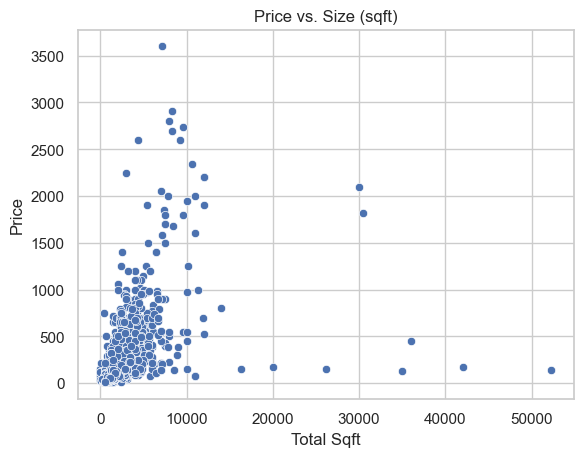

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='total_sqft', y='price')
plt.title('Price vs. Size (sqft)')
plt.xlabel('Total Sqft')
plt.ylabel('Price')
plt.show()


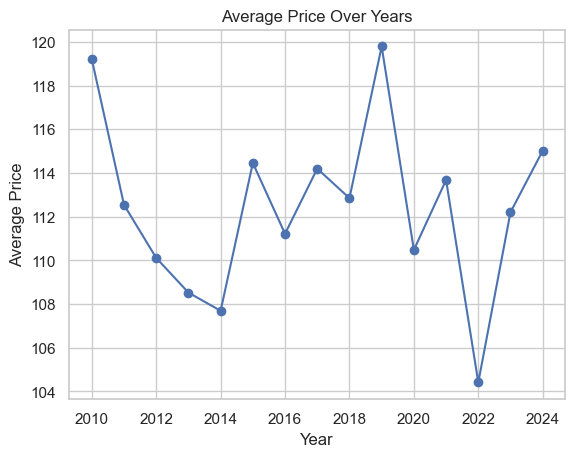

In [24]:
yearly_trend = df.groupby('year')['price'].mean()
yearly_trend.plot(kind='line', marker='o', title='Average Price Over Years')
plt.ylabel('Average Price')
plt.xlabel('Year')
plt.show()


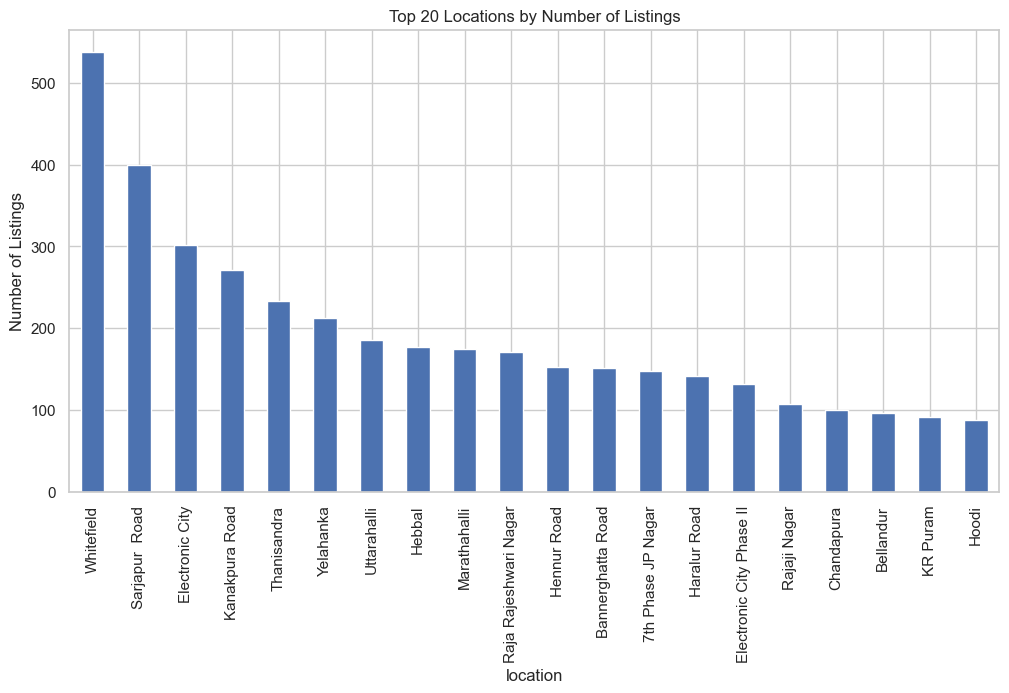

In [26]:
location_counts = df['location'].value_counts().head(20)
location_counts.plot(kind='bar', figsize=(12, 6), title='Top 20 Locations by Number of Listings')
plt.ylabel('Number of Listings')
plt.show()


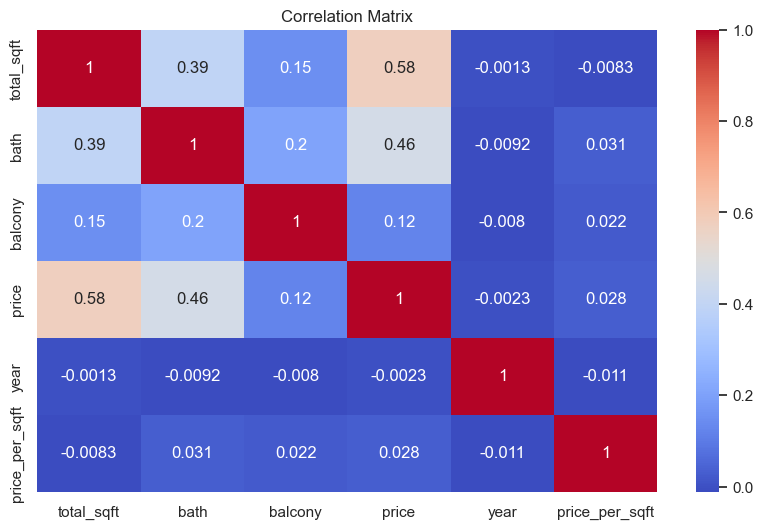

In [32]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
